In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clean data
df = pd.read_csv('../02_Processed_Data/logistics_transactions_clean.csv')

# --- 1. BINNING TRAFFIC CONGESTION LEVEL ---
# We will create 3 bins (Low, Medium, High) based on quartiles.
traffic_bins = ['Low Traffic', 'Medium Traffic', 'High Traffic']
df['Traffic_Bucket'] = pd.qcut(
    df['traffic_congestion_level'], 
    q=[0, 0.33, 0.66, 1], # Split points for roughly equal groups
    labels=traffic_bins
)

# --- 2. BINNING ROUTE RISK LEVEL ---
risk_bins = ['Low Risk', 'Moderate Risk', 'High Risk']
df['Risk_Bucket'] = pd.qcut(
    df['route_risk_level'], 
    q=[0, 0.33, 0.66, 1],
    labels=risk_bins
)

# --- 3. Final Aggregation for Visualization (Pandas GroupBy) ---
# Now we use Pandas (simpler than running SQL again) to find the Avg OCI per bucket
analysis_results = df.groupby('Traffic_Bucket')['Operational_Cost_Impact'].mean().reset_index()
analysis_results['Factor'] = 'Traffic'

risk_results = df.groupby('Risk_Bucket')['Operational_Cost_Impact'].mean().reset_index()
risk_results['Factor'] = 'Risk'

# Rename columns for consolidation
analysis_results.columns = ['Segment', 'Avg_OCI', 'Factor']
risk_results.columns = ['Segment', 'Avg_OCI', 'Factor']

# Combine results
final_bottlenecks = pd.concat([analysis_results, risk_results])

# Sort to show the highest cost impact first
final_bottlenecks = final_bottlenecks.sort_values(by='Avg_OCI', ascending=False)

print(final_bottlenecks)

          Segment     Avg_OCI   Factor
2       High Risk  571.223383     Risk
1  Medium Traffic  570.774599  Traffic
2    High Traffic  562.192388  Traffic
1   Moderate Risk  558.784046     Risk
0        Low Risk  557.657554     Risk
0     Low Traffic  554.972488  Traffic


C:\Users\user\AppData\Local\Temp\ipykernel_30076\1464758932.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_results = df.groupby('Traffic_Bucket')['Operational_Cost_Impact'].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_30076\1464758932.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_results = df.groupby('Risk_Bucket')['Operational_Cost_Impact'].mean().reset_index()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

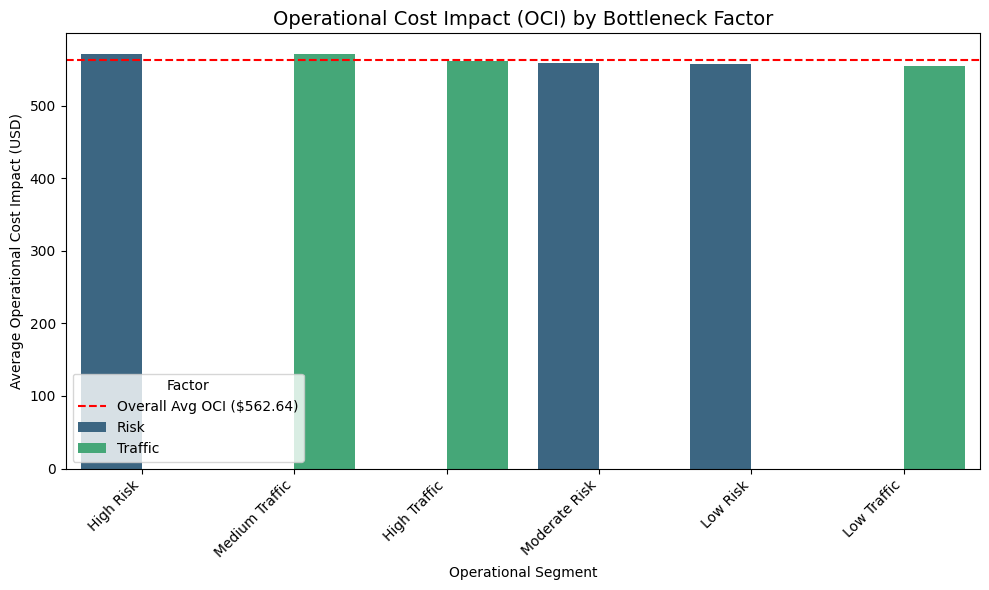

In [2]:
# --- 4. VISUALIZE THE BOTTLENECKS ---

plt.figure(figsize=(10, 6))

# Create a bar chart showing Avg_OCI for each segment
sns.barplot(
    data=final_bottlenecks,
    x='Segment',
    y='Avg_OCI',
    hue='Factor',
    palette='viridis' # A professional color palette
)

# Draw a line for the overall average OCI ($562.64)
plt.axhline(
    y=df['Operational_Cost_Impact'].mean(), 
    color='r', 
    linestyle='--', 
    label='Overall Avg OCI ($562.64)'
)

plt.title('Operational Cost Impact (OCI) by Bottleneck Factor', fontsize=14)
plt.xlabel('Operational Segment')
plt.ylabel('Average Operational Cost Impact (USD)')
plt.legend(title='Factor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the final chart
plt.savefig('../05_Insights_Reports/bottleneck_cost_analysis.png', dpi=300)
plt.show()